In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
import random
import math
from math import floor
import uuid
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy import optimize
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

In [2]:
## Additional functions

def int_to_pauli(i,n):
    p = np.base_repr(i,base=4)
    p = '0'*(n-len(p)) + p
    p = p.replace('0','I').replace('1', 'X').replace('2', 'Y').replace('3', 'Z')
    return p

def commute(p,q):
    c = 1
    n = len(p)
    for i in range(n):
        if p[i] != 'I' and q[i] != 'I':
            if p[i] != q[i]:
                c *= -1
    return c

def fidelity_to_error(pauli_fidelity,n):
    N = 4**n
    pauli_error = {}
    for i in range(N):
        p = int_to_pauli(i,n)
        pauli_error[p] = 0
        for j in range(N):
            q = int_to_pauli(j,n)
            pauli_error[p] += pauli_fidelity[q] * commute(p,q) / N
    return pauli_error
    

In [3]:
import copy
from copy import deepcopy
filename="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/0424eabXX_C10_248_23541"
with open(filename, "rb") as fp:   # Unpickling
    eab_data = pickle.load(fp)
# print (eab_data)
C=10
eab_data_2=deepcopy(eab_data[0:10]) #a copy that only has depth=[2,4]
eab_data_24=deepcopy(eab_data[0:20]) #a copy that only has depth=[2,4]
eab_data_248=deepcopy(eab_data[0:30]) #a copy that only has depth=[2,4]


In [4]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

nqubit=2
eab_results_2={}
eab_results_24={}
eab_results_248={}

'''Specify a set of Pauli you want to estimate'''
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full


In [5]:
depth=[2]
eab_results_2=EAB_process_modified.process_EAB(depth, eab_data_2, pauli_request_list)
print (eab_results_2)

{'fidelity_list': {'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.805, 0.804, 0.768, 0.65, 0.571, 0.5195, 0.782, 0.4035, 0.8345, 0.4805]}, 'IY': {2: [0.683, 0.766, 0.717, 0.6115, 0.4775, 0.5005, 0.7365, 0.3595, 0.806, 0.445]}, 'IZ': {2: [0.828, 0.889, 0.8, 0.8905, 0.8585, 0.933, 0.8695, 0.887, 0.9045, 0.8635]}, 'XI': {2: [0.7755, 0.8205, 0.7315, 0.8785, 0.8385, 0.8195, 0.8295, 0.7655, 0.755, 0.77]}, 'XX': {2: [0.6515, 0.6895, 0.5805, 0.5905, 0.5105, 0.453, 0.6665, 0.318, 0.6655, 0.4475]}, 'XY': {2: [0.5795, 0.6495, 0.5925, 0.562, 0.451, 0.45, 0.661, 0.343, 0.672, 0.444]}, 'XZ': {2: [0.6755, 0.7535, 0.6345, 0.807, 0.743, 0.7745, 0.763, 0.7415, 0.7365, 0.6995]}, 'YI': {2: [0.7085, 0.802, 0.6895, 0.861, 0.7945, 0.7955, 0.814, 0.7935, 0.776, 0.725]}, 'YX': {2: [0.5975, 0.669, 0.6165, 0.584, 0.4935, 0.455, 0.69, 0.354, 0.6885, 0.4565]}, 'YY': {2: [0.5995, 0.631, 0.5795, 0.5395, 0.497, 0.436, 0.6125, 0.297, 0.667, 0.405]}, 'YZ': {2: [0.7045, 0.749, 0.7055, 0.7895

In [6]:
depth=[2,4]
eab_results_24=EAB_process_modified.process_EAB(depth, eab_data_24, pauli_request_list)
# print (eab_results_24)

In [7]:
depth=[2,4,8]
eab_results_248=EAB_process_modified.process_EAB(depth, eab_data_248, pauli_request_list)
print (eab_results_248)

{'fidelity_list': {'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.805, 0.804, 0.768, 0.65, 0.571, 0.5195, 0.782, 0.4035, 0.8345, 0.4805], 4: [0.537, 0.5955, 0.629, 0.6, 0.494, 0.566, 0.6375, 0.65, 0.7175, 0.6445], 8: [0.74, 0.632, 0.6175, 0.645, 0.724, 0.672, 0.76, 0.748, 0.7175, 0.7095]}, 'IY': {2: [0.683, 0.766, 0.717, 0.6115, 0.4775, 0.5005, 0.7365, 0.3595, 0.806, 0.445], 4: [0.4975, 0.491, 0.6045, 0.3285, 0.4635, 0.476, 0.5155, 0.6535, 0.5945, 0.549], 8: [0.509, 0.463, 0.4235, 0.5415, 0.6555, 0.458, 0.6165, 0.6675, 0.4325, 0.618]}, 'IZ': {2: [0.828, 0.889, 0.8, 0.8905, 0.8585, 0.933, 0.8695, 0.887, 0.9045, 0.8635], 4: [0.8035, 0.8035, 0.8615, 0.6035, 0.8965, 0.723, 0.741, 0.8405, 0.749, 0.8235], 8: [0.563, 0.612, 0.618, 0.6275, 0.7855, 0.574, 0.7515, 0.6295, 0.524, 0.7615]}, 'XI': {2: [0.7755, 0.8205, 0.7315, 0.8785, 0.8385, 0.8195, 0.8295, 0.76

In [8]:
from scipy.optimize import curve_fit
def rcs_fit_fun_depth1(x, alpha):
        #return a * np.exp(-alpha * x)
        return alpha ** x

def fit_EAB_depth1(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun_depth1, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1])
        alpha = params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[0]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0


    return alpha, alpha_err

    print(alpha, alpha_err)

In [9]:
raw_fidelity_list = eab_results_2["fidelity_list"]
plot_dic={}
error_dic={}
err=[]
# sys.exit(0)
depth=[2]
fidelity_list = {}
stdev_list = {}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha, alpha_err = fit_EAB_depth1(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha
        stdev_list[pauli_label] = alpha_err

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=4000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], 1-fidelity_list[pauli_label], stdev_list[pauli_label])
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))

plot_2={}
plot_2=deepcopy(plot_dic)
err_2=deepcopy(error_dic)


Parameters: n = 2, C = 10,  L =  [2]
Measurement based simulation, shots = 4000
No readout error
Total error =  0.16457702240893624
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.18648909042349038 0.030696871643718725
YI 0.21881500270422505 0.0312874565044303
ZI 0.06600321199695769 0.006437133192824858
IX 0.10646768385245287 0.008065459100499717
XX 0.25347471576643843 0.025844981788290828
YX 0.2648469547094292 0.02408892550971256
ZX 0.14393341380474378 0.009303099780862011
IY 0.11911975842342803 0.00946273595748402
XY 0.2513679141260373 0.024292123551679406
YY 0.2744657141113178 0.025461834972161035
ZY 0.13756159640238652 0.006128997276388972
IZ 0.0760140693711836 0.006181761024815396
XZ 0.22854034454159555 0.030140618731423135
YZ 0.23214584718190134 0.03000510324909124
ZZ 0.0739870411273933 0.004852705712981835


In [10]:
raw_fidelity_list = eab_results_24["fidelity_list"]
plot_dic={}
error_dic={}
err=[]
# sys.exit(0)
depth=[2,4]
fidelity_list = {}
stdev_list = {}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha, alpha_err = EAB_process_modified.fit_EAB(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha
        stdev_list[pauli_label] = alpha_err

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=4000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], 1-fidelity_list[pauli_label], stdev_list[pauli_label])
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))

plot_24={}
plot_24=deepcopy(plot_dic)
err_24=deepcopy(error_dic)

Parameters: n = 2, C = 10,  L =  [2, 4]
Measurement based simulation, shots = 4000
No readout error
Total error =  0.07942481895617437
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.04221785859103944 0.0394701098149651
YI 0.0792571974323496 0.0448883509981078
ZI 0.051658118513261186 0.017338971145040242
IX 0.08608919147880523 0.01908564470507785
XX 0.08346724085690693 0.03583782030626364
YX 0.13177407074871494 0.034443964195875885
ZX 0.13321665588952092 0.023343784227310423
IY 0.13991954724849587 0.02528527207756496
XY 0.13648924945411178 0.034192124987205225
YY 0.08693833124906114 0.037186478695428404
ZY 0.09599647588891003 0.02007551476574854
IZ 0.05436194431630059 0.016930530920393712
XZ 0.08658471631622633 0.04347207110882769
YZ 0.0521573449254179 0.04102713470538622
ZZ 0.010669160389669363 0.006438296798146959


In [11]:
raw_fidelity_list = eab_results_248["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,4,8]
fidelity_list = {}
stdev_list = {}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha, alpha_err = EAB_process_modified.fit_EAB(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha
        stdev_list[pauli_label] = alpha_err

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=4000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], 1-fidelity_list[pauli_label], stdev_list[pauli_label])
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))

plot_248={}
plot_248=deepcopy(plot_dic)
err_248=deepcopy(error_dic)

Parameters: n = 2, C = 10,  L =  [2, 4, 8]
Measurement based simulation, shots = 4000
No readout error
Total error =  0.024177459877246177
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI -0.026952955095538966 0.009028046633335052
YI 0.008540924687502005 0.015136596504993896
ZI 0.04946975069729298 0.007026648708393976
IX 0.03567715133620042 0.00524801945690977
XX 0.011444693546713847 0.010725488254331426
YX 0.022099728950128794 0.013582559799579987
ZX 0.0665954614364711 0.007988615560064038
IY 0.06740622961966891 0.007791129346971156
XY 0.026144881621056437 0.012819086925767843
YY 0.01700100655635861 0.011836843385698447
ZY 0.04708446134056388 0.005281566397011568
IZ 0.05100660329504947 0.007279429066467664
XZ 0.015711496638466382 0.015237381702832417
YZ -0.01896433709167833 0.009137690634680992
ZZ 0.014574260497683289 0.0025295617495387462


In [12]:
full_results_plot={}

for key , infidelity in plot_2.items():
    full_results_plot[key]={}
    full_results_plot[key]["results"]=[]
    full_results_plot[key]["results"].append(infidelity)
    full_results_plot[key]["results"].append(plot_24[key])
    full_results_plot[key]["results"].append(plot_248[key])
    full_results_plot[key]["errors"]=[]
    full_results_plot[key]["errors"].append(err_2[key])
    full_results_plot[key]["errors"].append(err_24[key])
    full_results_plot[key]["errors"].append(err_248[key])
    
print (full_results_plot) 

{'II': {'results': [0.0, 0.0, 0.0], 'errors': [0.0, 0.0, 0.0]}, 'XI': {'results': [0.18648909042349038, 0.04221785859103944, -0.026952955095538966], 'errors': [0.030696871643718725, 0.0394701098149651, 0.009028046633335052]}, 'YI': {'results': [0.21881500270422505, 0.0792571974323496, 0.008540924687502005], 'errors': [0.0312874565044303, 0.0448883509981078, 0.015136596504993896]}, 'ZI': {'results': [0.06600321199695769, 0.051658118513261186, 0.04946975069729298], 'errors': [0.006437133192824858, 0.017338971145040242, 0.007026648708393976]}, 'IX': {'results': [0.10646768385245287, 0.08608919147880523, 0.03567715133620042], 'errors': [0.008065459100499717, 0.01908564470507785, 0.00524801945690977]}, 'XX': {'results': [0.25347471576643843, 0.08346724085690693, 0.011444693546713847], 'errors': [0.025844981788290828, 0.03583782030626364, 0.010725488254331426]}, 'YX': {'results': [0.2648469547094292, 0.13177407074871494, 0.022099728950128794], 'errors': [0.02408892550971256, 0.03444396419587

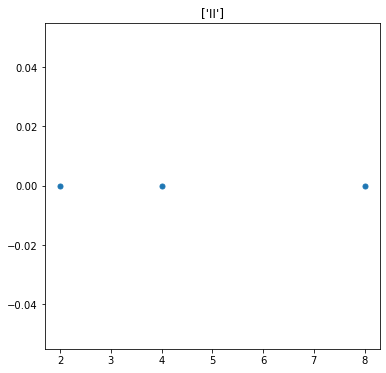

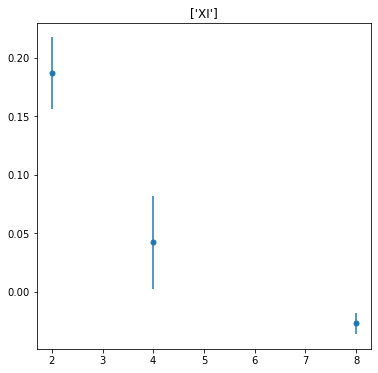

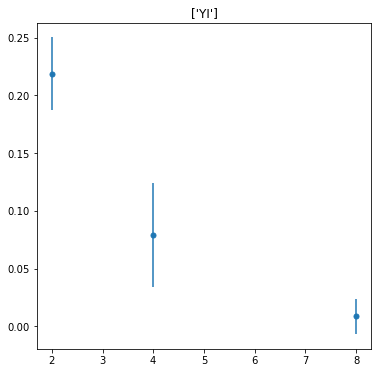

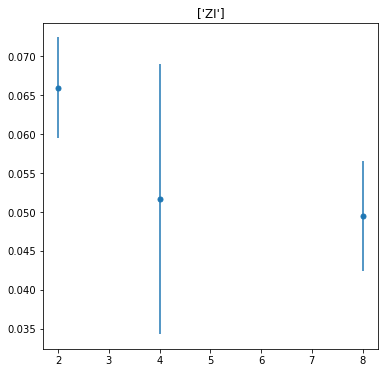

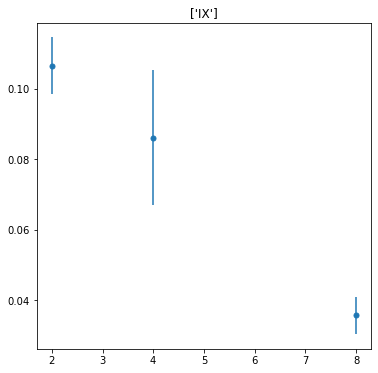

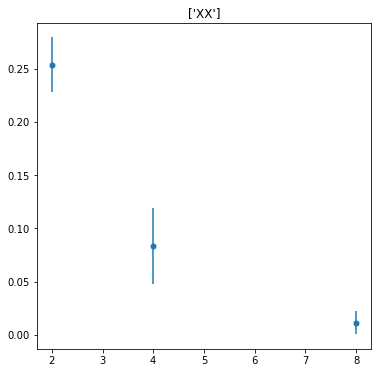

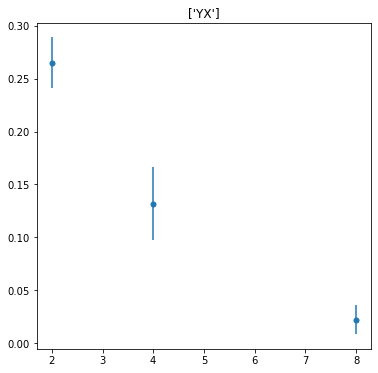

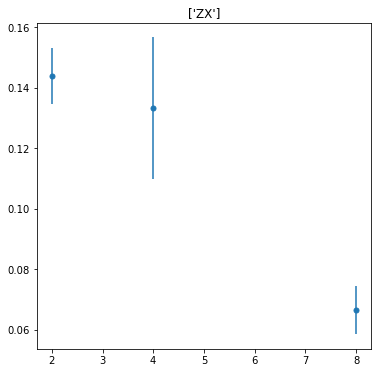

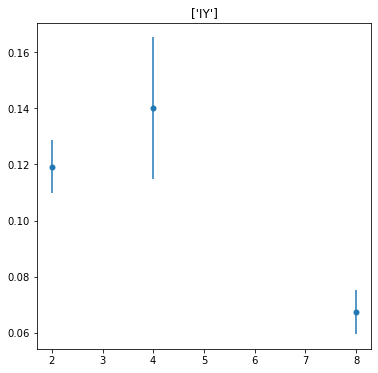

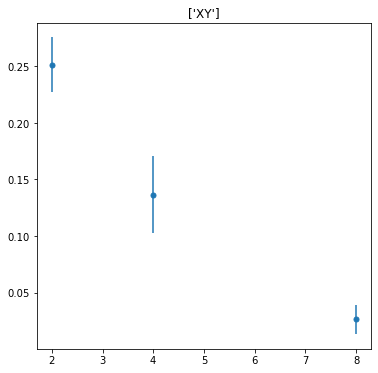

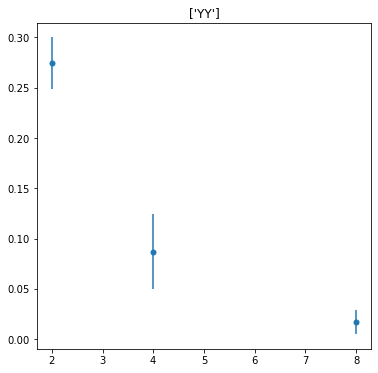

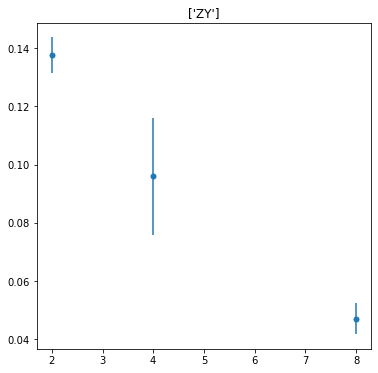

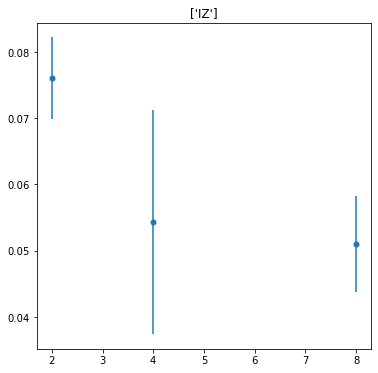

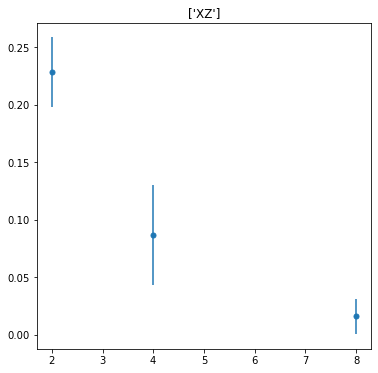

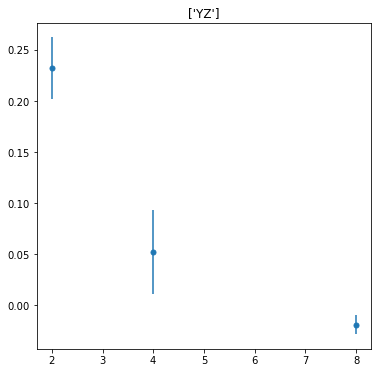

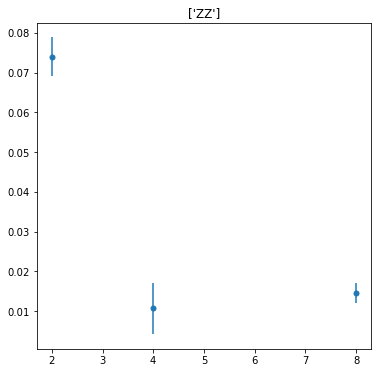

In [13]:
depth=[2,4,8]
yerr_fixed=[0,0,0]
for key,values in full_results_plot.items():
#         print(key)
        f=plt.figure(figsize=(6,6))
        plt.errorbar(depth,values["results"], yerr=values["errors"], fmt='o',markersize=5)
        plt.title([key])

#error bar of the first point might not be correct because it doesn't have the fit parameter "a", only alpha. Needs to check 

To do: plot the fit of negative parameters

In [14]:
def rcs_fit_fun(x, a, alpha):
        #return a * np.exp(-alpha * x)
        return a * (alpha ** x)

def fit_EAB_plot(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
        alpha = params[1]
        a=params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[1]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0

    # params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
    # #params, pcov = curve_fit(rcs_fit_fun, X, Y, absolute_sigma=True, p0=[1,1])


    # print(params)

    return alpha,a, alpha_err,Y, Yerr

    print(alpha, alpha_err)




In [15]:
raw_fidelity_list = eab_results_248["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,4,8]
fidelity_list = {}
stdev_list = {}
a248_dic={}
Y248_dic={}
Yerr248_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a248_dic[pauli_label]=a 
        Y248_dic[pauli_label]=Y
        Yerr248_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=4000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], 1-fidelity_list[pauli_label], stdev_list[pauli_label])
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], fidelity_list[pauli_label])

plot_248={}
plot_248=deepcopy(plot_dic)
err_248=deepcopy(error_dic)
print (fidelity_list)

Parameters: n = 2, C = 10,  L =  [2, 4, 8]
Measurement based simulation, shots = 4000
No readout error
Total error =  0.024177459877246177
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI -0.026952955095538966 0.009028046633335052
YI 0.008540924687502005 0.015136596504993896
ZI 0.04946975069729298 0.007026648708393976
IX 0.03567715133620042 0.00524801945690977
XX 0.011444693546713847 0.010725488254331426
YX 0.022099728950128794 0.013582559799579987
ZX 0.0665954614364711 0.007988615560064038
IY 0.06740622961966891 0.007791129346971156
XY 0.026144881621056437 0.012819086925767843
YY 0.01700100655635861 0.011836843385698447
ZY 0.04708446134056388 0.005281566397011568
IZ 0.05100660329504947 0.007279429066467664
XZ 0.015711496638466382 0.015237381702832417
YZ -0.01896433709167833 0.009137690634680992
ZZ 0.014574260497683289 0.0025295617495387462
II 1.0
XI 1.026952955095539
YI 0.991459075312498
ZI 0.950530249302707
IX 0.9643228486637996
XX 0.9885553064532862
YX 0.9779002710498712


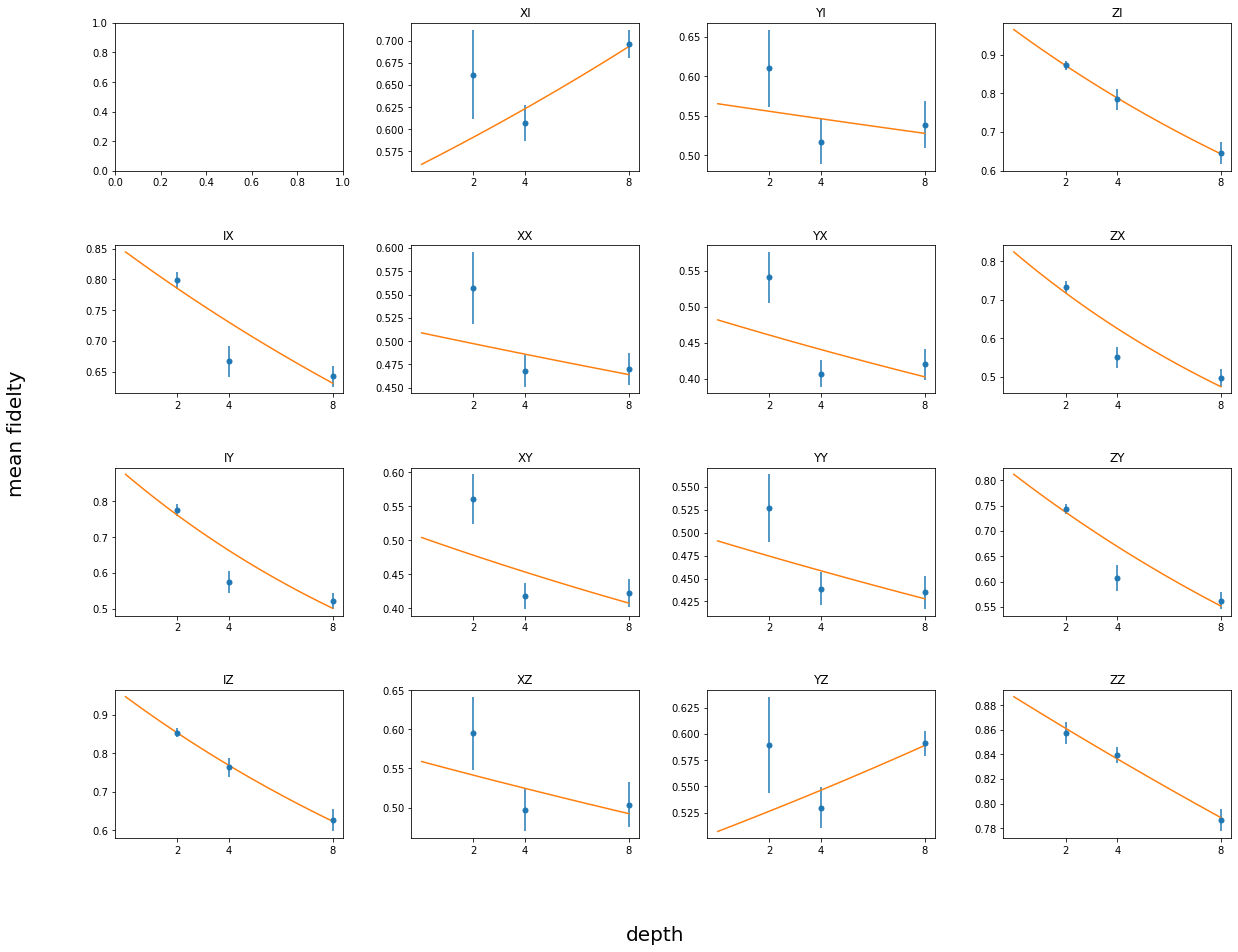

In [30]:
# # print (fidelity_list)
# x_c=np.linspace(0,8,num=80)
# f=plt.figure(figsize=(6,6))
# plt.errorbar(depth,Y248_dic["IX"], yerr=Yerr248_dic["IX"], fmt='o',markersize=5)
# plt.plot(x_c,rcs_fit_fun(x_c,a248_dic["IX"], fidelity_list["IX"]))
# print ("fidelity=",fidelity_list["IX"])
# plt.title(["XI"])


# f=plt.figure(figsize=(6,6))
# plt.errorbar(depth,Y248_dic["ZY"], yerr=Yerr248_dic["ZY"], fmt='o',markersize=5)
# plt.plot(x_c,rcs_fit_fun(x_c,a248_dic["ZY"], fidelity_list["ZY"]))
# print ("fidelity=",fidelity_list["ZY"])
# plt.title(["YZ"])

# f=plt.figure(figsize=(6,6))
# plt.errorbar(depth,Y248_dic["YI"], yerr=Yerr248_dic["YI"], fmt='o',markersize=5)
# plt.plot(x_c,rcs_fit_fun(x_c,a248_dic["YI"], fidelity_list["YI"]))
# print ("fidelity=",fidelity_list["YI"])
# plt.title(["YI"])

# print (Y248_dic)
x_c=np.linspace(0,8,num=80)
nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks([2,4,8])   
            axs[i, j].errorbar(depth,Y248_dic[pauli_label], yerr=Yerr248_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a248_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
fig.savefig("fit.pdf", format="pdf", dpi=500)        

In [ ]:
def rcs_fit_linear(x, a, alpha):
        #return a * np.exp(-alpha * x)
        return a* (alpha ** x)

def fit_EAB_linear(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_linear, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
        alpha = params[1]
        a=params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[1]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0

    # params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
    # #params, pcov = curve_fit(rcs_fit_fun, X, Y, absolute_sigma=True, p0=[1,1])


    # print(params)

    return alpha,a, alpha_err,Y, Yerr

    print(alpha, alpha_err)



In [ ]:
f2= [0.805, 0.804, 0.768, 0.65, 0.571, 0.5195, 0.782, 0.4035, 0.8345, 0.4805]
f4=[0.537, 0.5955, 0.629, 0.6, 0.494, 0.566, 0.6375, 0.65, 0.7175, 0.6445]
f8= [0.74, 0.632, 0.6175, 0.645, 0.724, 0.672, 0.76, 0.748, 0.7175, 0.7095]
print (np.mean(f2))
print (np.mean(f4))
print (np.mean(f8))

In [ ]:
import numpy as np
f2=[0.988, 0.982, 0.984, 0.988, 0.992]
f4=[0.992, 0.992, 0.99, 0.992, 0.988]
f8=[0.994, 0.988, 0.986, 0.99, 0.994] 
f16=[0.988, 0.996, 0.994, 0.996, 0.992]
f32=[0.996, 0.984, 0.996, 0.994, 0.994]
print (np.mean(f2))
print (np.mean(f4))
print (np.mean(f8))
print (np.mean(f16))
print (np.mean(f32))

# Senrui's code CNOT C=10 Lrange=[2,4,8,16,32], ep=0.01

0.9898
0.9917999999999999
0.9918000000000001
0.9865999999999999
0.9904


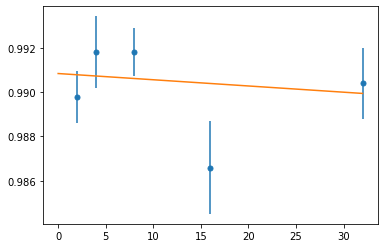

In [31]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def rcs_fit_fun(x, a, alpha):
        #return a * np.exp(-alpha * x)
        return a * (alpha ** x)

def fit_EAB_no_error_plot(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
#     Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=[0,0,0,0,0], absolute_sigma=True, p0=[1,1])
        alpha = params[1]
        a=params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[1]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0

    # params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
    # #params, pcov = curve_fit(rcs_fit_fun, X, Y, absolute_sigma=True, p0=[1,1])


    # print(params)

    return alpha,a, alpha_err,Y, Yerr

    print(alpha, alpha_err)



depth=[2,4,8,16,32]
rawf={}
f2=[0.99, 0.992, 0.988, 0.994, 0.988, 0.994, 0.992, 0.984, 0.984, 0.992]
f4=[0.984, 0.988, 0.986, 0.994, 0.998, 0.992, 0.99, 0.998, 0.998, 0.99]
f8=[0.99, 0.996, 0.994, 0.994, 0.99, 0.996, 0.994, 0.988, 0.99, 0.986]
f16=[0.982, 0.992, 0.996, 0.978, 0.988, 0.988, 0.976, 0.988, 0.994, 0.984]
f32=[0.992, 0.996, 0.994, 0.998, 0.99, 0.984, 0.984, 0.99, 0.984, 0.992]
print (np.mean(f2))
print (np.mean(f4))
print (np.mean(f8))
print (np.mean(f16))
print (np.mean(f32))

rawf[2]=f2
rawf[4]=f4
rawf[8]=f8
rawf[16]=f16
rawf[32]=f32
# print (rawf)
# Y = [np.mean(rawf[str(L)]) for L in depth]
alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, rawf)
# fidelity_list[pauli_label] = alpha
# stdev_list[pauli_label] = alpha_err
# a248_dic[pauli_label]=a
# Y248_dic[pauli_label]=Y
# Yerr248_dic[pauli_label]=Yerr
x_c=np.linspace(0,32,num=80)
plt.errorbar(depth,Y, yerr=Yerr, fmt='o',markersize=5)
plt.plot(x_c,rcs_fit_fun(x_c,a, alpha))

